In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import numpy as np
plt.style.use('fivethirtyeight')
import time
from datetime import datetime 

In [2]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [3]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [4]:
from nba_api.stats.endpoints.leagueleaders import LeagueLeaders

# 2019-2020 League Leaders

In [5]:
ll_1 = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS', season='2019-20')
df_ll_1 = ll_1.get_data_frames()[0]
df_ll_1.head()
#Per game statistics
#I've taken a look at the league leaders of last season before draft

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,201935,1,James Harden,HOU,68,36.5,9.9,22.3,0.444,4.4,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,34.3,32.6
1,203078,2,Bradley Beal,WAS,57,36.0,10.4,22.9,0.455,3.0,...,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,30.5,25.4
2,203081,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,4.1,...,0.888,0.5,3.8,4.3,8.0,1.1,0.3,2.9,30.0,28.9
3,1629027,4,Trae Young,ATL,60,35.3,9.1,20.8,0.437,3.4,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,29.6,26.6
4,203507,5,Giannis Antetokounmpo,MIL,63,30.4,10.9,19.7,0.553,1.4,...,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,29.5,34.6


In [6]:
df_ll_1['eFG%'] = (df_ll_1['FGM'] + 0.5 * df_ll_1['FG3M']) / df_ll_1['FGA']

In [7]:
df_ll_1['eFG%'] = df_ll_1['eFG%'].round(2)

In [8]:
df_ll_1 = df_ll_1.sort_values(by=['PTS', 'eFG%'], ascending=False)
#Sorted by PTS and eFG%

In [9]:
print('League Average 2019-20')
for cols in df_ll_1.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll_1[cols].mean():.2f}')

League Average 2019-20
PLAYER_ID: 928477.02
RANK: 130.99
GP: 61.93
MIN: 25.26
FGM: 4.37
FGA: 9.48
FG_PCT: 0.46
FG3M: 1.34
FG3A: 3.69
FG3_PCT: 0.34
FTM: 1.95
FTA: 2.50
FT_PCT: 0.77
OREB: 1.01
DREB: 3.61
REB: 4.62
AST: 2.63
STL: 0.80
BLK: 0.50
TOV: 1.47
PTS: 12.02
EFF: 13.43
eFG%: 0.53


# 2020-2021 League Leaders

In [10]:
ll = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS')
df_ll = ll.get_data_frames()[0]
df_ll.head()
#Per game statistics

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,201935,1,James Harden,HOU,3,37.7,10.7,20.3,0.525,5.0,...,0.889,1.0,4.3,5.3,11.0,1.0,0.3,5.3,37.0,38.3
1,201939,2,Stephen Curry,GSW,6,33.5,10.0,21.8,0.458,4.3,...,0.980,0.7,4.0,4.7,6.2,1.2,0.3,3.8,32.3,28.8
2,203078,3,Bradley Beal,WAS,7,35.4,10.4,22.7,0.459,1.6,...,0.864,1.3,3.7,5.0,4.7,1.6,0.7,3.3,30.6,25.7
3,201142,4,Kevin Durant,BKN,6,34.2,9.0,17.5,0.514,2.5,...,0.885,0.5,6.5,7.0,4.8,1.2,0.8,3.5,28.2,29.0
4,1629027,4,Trae Young,ATL,6,32.2,7.8,17.3,0.452,2.2,...,0.886,1.7,2.8,4.5,8.3,0.3,0.2,3.8,28.2,26.8


In [11]:
df_ll.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF'],
      dtype='object')

In [12]:
df_ll['eFG%'] = (df_ll['FGM'] + 0.5 * df_ll['FG3M']) / df_ll['FGA']

In [13]:
df_ll['eFG%'] = df_ll['eFG%'].round(2)

In [14]:
df_ll = df_ll.sort_values(by=['PTS', 'eFG%'], ascending=False)

In [15]:
print('League Average 2020-2021')
for cols in df_ll.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll[cols].mean():.2f}')

League Average 2020-2021
PLAYER_ID: 1011058.50
RANK: 140.47
GP: 5.86
MIN: 23.95
FGM: 4.06
FGA: 8.84
FG_PCT: 0.46
FG3M: 1.26
FG3A: 3.48
FG3_PCT: 0.32
FTM: 1.79
FTA: 2.33
FT_PCT: 0.70
OREB: 0.97
DREB: 3.51
REB: 4.48
AST: 2.46
STL: 0.79
BLK: 0.48
TOV: 1.45
PTS: 11.17
EFF: 12.61
eFG%: 0.53


# After draft

In [16]:
players = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 'Al Horford', 
           'Jusuf Nurkic', 'Thomas Bryant', 'Dennis Schroder', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Anthony Edwards']
#This is my team after draft

df_ll_1['Fantasy_team'] = 'N'

for player in df_ll_1.loc[: ,'PLAYER']:
    if player in players:
        df_ll_1.loc[df_ll_1[df_ll_1['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [17]:
df_ll_1.loc[df_ll_1.Fantasy_team == 'Y'] #My players in 2019-20 season
#Where is Jusuf Nurkic and Thomas Bryant? Anthony Edwards has been drafted in 2020. 

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,eFG%,Fantasy_team
2,203081,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,4.1,...,3.8,4.3,8.0,1.1,0.3,2.9,30.0,28.9,0.57,Y
15,1626156,16,D'Angelo Russell,MIN,45,32.3,8.0,18.8,0.426,3.5,...,3.6,3.9,6.3,1.1,0.3,3.3,23.1,19.8,0.52,Y
31,202699,32,Tobias Harris,PHI,72,34.3,7.7,16.3,0.471,1.8,...,5.9,6.9,3.2,0.7,0.6,1.4,19.6,20.3,0.53,Y
38,203471,39,Dennis Schroder,OKC,65,30.8,7.0,14.8,0.469,1.9,...,3.3,3.6,4.0,0.7,0.2,2.6,18.9,16.5,0.54,Y
63,1628389,64,Bam Adebayo,MIA,72,33.6,6.1,11.0,0.557,0.0,...,7.8,10.2,5.1,1.1,1.3,2.8,15.9,24.3,0.55,Y
74,203115,75,Will Barton,DEN,58,33.0,5.7,12.7,0.450,1.9,...,5.0,6.3,3.7,1.1,0.5,1.5,15.1,17.5,0.52,Y
92,203935,93,Marcus Smart,BOS,60,32.0,4.3,11.4,0.375,2.3,...,3.1,3.8,4.9,1.7,0.5,1.7,12.9,14.5,0.48,Y
108,201143,109,Al Horford,PHI,67,30.2,4.8,10.6,0.450,1.5,...,5.3,6.8,4.0,0.8,0.9,1.2,11.9,17.1,0.52,Y
127,1629629,128,Cam Reddish,ATL,58,26.7,3.7,9.6,0.384,1.4,...,3.1,3.7,1.5,1.1,0.5,1.7,10.5,9.3,0.46,Y
155,1628464,156,Daniel Theis,BOS,65,24.1,3.7,6.6,0.566,0.5,...,4.4,6.6,1.7,0.6,1.3,0.8,9.2,15.3,0.60,Y


In [18]:
for player in df_ll.loc[: ,'PLAYER']:
    if player in players:
        df_ll.loc[df_ll[df_ll['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [19]:
df_ll_fant_team = df_ll.loc[df_ll.Fantasy_team == 'Y']
df_ll_fant_team #My players in 2020-21 season

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,eFG%,Fantasy_team
8,203081,9,Damian Lillard,POR,6,35.8,8.2,19.2,0.426,3.8,...,4.0,4.3,6.2,0.7,0.3,3.5,26.3,22.8,0.53,Y
40,1628389,41,Bam Adebayo,MIA,5,32.0,7.2,11.4,0.632,0.0,...,6.8,8.0,4.4,1.6,1.0,4.0,19.0,24.8,0.63,Y
43,202699,43,Tobias Harris,PHI,6,31.8,7.2,14.3,0.500,2.5,...,6.7,8.5,3.2,1.5,1.5,2.2,18.8,24.0,0.59,Y
46,1628418,47,Thomas Bryant,WAS,7,29.4,7.4,11.1,0.667,1.3,...,4.7,6.7,1.7,0.4,1.0,1.6,17.9,21.4,0.73,Y
54,1626156,54,D'Angelo Russell,MIN,6,29.2,6.7,15.7,0.426,2.8,...,2.3,3.0,4.5,1.3,0.3,3.7,16.8,12.3,0.52,Y
58,203471,59,Dennis Schroder,LAL,7,30.4,6.3,13.6,0.463,1.4,...,3.9,4.4,4.9,0.6,0.1,2.6,16.3,15.9,0.51,Y
83,1630162,84,Anthony Edwards,MIN,6,25.0,5.3,12.5,0.427,1.8,...,1.3,2.0,2.2,0.7,0.3,1.3,13.7,9.8,0.50,Y
100,203935,101,Marcus Smart,BOS,7,33.1,3.7,9.7,0.382,2.3,...,1.6,2.3,6.7,1.6,0.9,1.9,12.6,15.1,0.50,Y
127,201143,128,Al Horford,OKC,4,27.5,4.3,9.0,0.472,2.0,...,7.0,7.5,3.5,0.3,0.5,0.8,10.8,17.0,0.59,Y
126,1629629,126,Cam Reddish,ATL,6,28.3,3.5,9.2,0.382,1.3,...,3.7,4.7,1.3,1.3,0.3,1.5,10.8,10.8,0.45,Y


In [20]:
from nba_api.stats.static.teams import get_teams
from nba_api.stats.static.players import get_active_players

In [21]:
df_teams = pd.DataFrame(data=get_teams()) 

In [22]:
df_players = pd.DataFrame(data=get_active_players())

In [23]:
id_lillard = df_players.loc[df_players['full_name'] == 'Damian Lillard', 'id']

In [24]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [25]:
lillard_games = CumeStatsPlayerGames(player_id=id_lillard, league_id='00', season='2020-21', 
                                     season_type_all_star='Regular Season')

In [26]:
df_lillard_games = lillard_games.get_data_frames()[0]
df_lillard_games

,MATCHUP,GAME_ID
0,01/03/2021 Trail Blazers at Warriors,0022000092
1,01/01/2021 Trail Blazers at Warriors,0022000078
2,12/30/2020 Trail Blazers at Clippers,0022000061
3,12/28/2020 Trail Blazers at Lakers,0022000045
4,12/26/2020 Rockets at Trail Blazers,0022000029
5,12/23/2020 Jazz at Trail Blazers,0022000020


In [27]:
player_ids = list(df_ll_fant_team.PLAYER_ID)
game_ids = []

for ids in player_ids:
    df = CumeStatsPlayerGames(player_id=ids, league_id='00', season='2020-21', 
                                     season_type_all_star='Regular Season').get_data_frames()[0]
    game_ids.append(df)
game_ids = pd.concat(game_ids)
time.sleep(2)

In [28]:
game_ids.index = range(0,len(game_ids))

In [29]:
game_ids['MATCHUP_DATE'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_DATE'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][0]

In [30]:
game_ids['MATCHUP_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_TEAM'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][1:]

In [31]:
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.MATCHUP_TEAM.iloc[i] = ' '.join(game_ids.MATCHUP_TEAM.iloc[i])

In [32]:
game_ids = game_ids.drop(labels='MATCHUP', axis=1)

In [33]:
game_ids['HOME_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.HOME_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[1]

In [34]:
game_ids['AWAY_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.AWAY_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[0]

In [35]:
game_ids = game_ids.drop('MATCHUP_TEAM', axis=1)
game_ids

,GAME_ID,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
0,0022000092,01/03/2021,Warriors,Trail Blazers
1,0022000078,01/01/2021,Warriors,Trail Blazers
2,0022000061,12/30/2020,Clippers,Trail Blazers
3,0022000045,12/28/2020,Lakers,Trail Blazers
4,0022000029,12/26/2020,Trail Blazers,Rockets
...,...,...,...,...
74,0022000056,12/30/2020,Celtics,Grizzlies
75,0022000048,12/29/2020,Pacers,Celtics
76,0022000037,12/27/2020,Pacers,Celtics
77,0022000007,12/25/2020,Celtics,Nets


In [36]:
game_ids.HOME_TEAM = game_ids.HOME_TEAM.str.replace(' ', '')

In [37]:
game_ids.AWAY_TEAM = game_ids.AWAY_TEAM.str.replace(' ', '')

In [38]:
game_ids.loc[game_ids.HOME_TEAM == 'He', 'HOME_TEAM'] = 'Heat'

In [39]:
game_ids[game_ids.HOME_TEAM == '']

,GAME_ID,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
6,0022000071,01/01/2021,,He
10,0022000012,12/23/2020,,He


In [40]:
from nba_api.stats.endpoints.leaguegamelog import LeagueGameLog

In [41]:
lgl = LeagueGameLog()

In [42]:
df_lgl = lgl.get_data_frames()[0]

In [43]:
df_lgl.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [44]:
df_lgl[df_lgl.GAME_ID == '0022000071']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
136,22020,1610612748,MIA,Miami Heat,0022000071,2021-01-01,MIA @ DAL,L,240,29,...,36,41,20,10,2,16,24,83,-10,1
137,22020,1610612742,DAL,Dallas Mavericks,0022000071,2021-01-01,DAL vs. MIA,W,240,32,...,45,49,18,9,3,17,25,93,10,1


In [45]:
game_ids.loc[game_ids.GAME_ID == '0022000071', 'HOME_TEAM'] = 'Mavericks'

In [46]:
df_lgl[df_lgl.GAME_ID == '0022000012']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
8,22020,1610612753,ORL,Orlando Magic,0022000012,2020-12-23,ORL vs. MIA,W,240,42,...,30,41,23,15,3,18,19,113,6,1
9,22020,1610612748,MIA,Miami Heat,0022000012,2020-12-23,MIA @ ORL,L,240,42,...,36,43,25,11,2,22,21,107,-6,1


In [47]:
game_ids.loc[game_ids.GAME_ID == '0022000012', 'HOME_TEAM'] = 'Magic'

In [48]:
game_ids.loc[game_ids.AWAY_TEAM == 'He', 'AWAY_TEAM'] = 'Heat'

In [49]:
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2

In [50]:
new_data = []
for i in list(game_ids.GAME_ID):
    df = BoxScoreTraditionalV2(game_id=i).get_data_frames()[0]
    new_data.append(df)
new_data = pd.concat(new_data)
time.sleep(2)

In [51]:
new_data.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0022000092,1610612757,POR,Portland,1627884,Derrick Jones Jr.,F,,16:54,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,3.0,-8.0
1,0022000092,1610612757,POR,Portland,203496,Robert Covington,F,,27:13,2.0,...,0.0,2.0,2.0,1.0,2.0,0.0,2.0,3.0,6.0,-8.0
2,0022000092,1610612757,POR,Portland,203994,Jusuf Nurkic,C,,23:21,3.0,...,2.0,4.0,6.0,3.0,2.0,2.0,2.0,2.0,7.0,-14.0
3,0022000092,1610612757,POR,Portland,203468,CJ McCollum,G,,37:58,10.0,...,1.0,8.0,9.0,5.0,2.0,0.0,1.0,4.0,28.0,-17.0
4,0022000092,1610612757,POR,Portland,203081,Damian Lillard,G,,39:09,10.0,...,0.0,4.0,4.0,4.0,0.0,0.0,5.0,3.0,32.0,-10.0


In [52]:
df_inner_join = pd.merge(new_data, game_ids, on='GAME_ID', how='inner')

In [67]:
df_inner_join.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
1429,0022000063,1610612764,WAS,Washington,1629060,Rui Hachimura,F,,25:13,5.0,...,3.0,1.0,0.0,2.0,1.0,17.0,13.0,12/31/2020,Wizards,Bulls
3292,0022000067,1610612760,OKC,Oklahoma City,1628983,Shai Gilgeous-Alexander,G,,28:29,3.0,...,4.0,2.0,0.0,2.0,2.0,8.0,-14.0,12/31/2020,Thunder,Pelicans
3303,0022000067,1610612760,OKC,Oklahoma City,203121,Darius Miller,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2020,Thunder,Pelicans
3302,0022000067,1610612760,OKC,Oklahoma City,1628382,Justin Jackson,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2020,Thunder,Pelicans
3301,0022000067,1610612760,OKC,Oklahoma City,1630221,Josh Hall,,,10:19,1.0,...,0.0,0.0,0.0,0.0,3.0,3.0,-20.0,12/31/2020,Thunder,Pelicans


In [73]:
df_inner_join['MATCHUP_DATE'] = pd.to_datetime(df_inner_join.MATCHUP_DATE)

In [79]:
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE')

In [81]:
df_inner_join.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM'],
      dtype='object')

In [85]:
df_inner_join_fant = df_inner_join[['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID','PLAYER_NAME', 
                                    'START_POSITION', 'COMMENT', 'MIN', 'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 
                                    'STL', 'BLK', 'TO', 'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM']]
df_inner_join_fant

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FG_PCT,...,FG3M,PTS,REB,AST,STL,BLK,TO,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
2453,0022000002,1610612746,LAC,LA,1629611,Terance Mann,,,1:03,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
2465,0022000002,1610612747,LAL,Los Angeles,1628398,Kyle Kuzma,,,26:38,0.545,...,1.0,15.0,1.0,0.0,0.0,0.0,2.0,2020-12-22,Lakers,Clippers
2456,0022000002,1610612746,LAC,LA,1629599,Amir Coffey,,,0:57,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
2467,0022000002,1610612747,LAL,Los Angeles,1627936,Alex Caruso,,,16:40,0.200,...,1.0,3.0,2.0,1.0,0.0,0.0,3.0,2020-12-22,Lakers,Clippers
2466,0022000002,1610612747,LAL,Los Angeles,202693,Markieff Morris,,,19:00,0.333,...,1.0,5.0,4.0,1.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,0022000088,1610612750,MIN,Minnesota,1629633,Jarrett Culver,F,,28:28,0.615,...,1.0,20.0,6.0,0.0,3.0,0.0,2.0,2021-01-03,Timberwolves,Nuggets
1567,0022000088,1610612743,DEN,Denver,1629626,Bol Bol,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-03,Timberwolves,Nuggets
1579,0022000088,1610612750,MIN,Minnesota,202334,Ed Davis,C,,24:02,0.250,...,0.0,5.0,8.0,1.0,1.0,1.0,0.0,2021-01-03,Timberwolves,Nuggets
1582,0022000088,1610612750,MIN,Minnesota,1627736,Malik Beasley,G,,38:04,0.625,...,3.0,25.0,7.0,5.0,1.0,2.0,1.0,2021-01-03,Timberwolves,Nuggets


In [88]:
df_inner_join_fant.index = range(0, len(df_inner_join_fant))
df_inner_join_fant

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FG_PCT,...,FG3M,PTS,REB,AST,STL,BLK,TO,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
0,0022000002,1610612746,LAC,LA,1629611,Terance Mann,,,1:03,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
1,0022000002,1610612747,LAL,Los Angeles,1628398,Kyle Kuzma,,,26:38,0.545,...,1.0,15.0,1.0,0.0,0.0,0.0,2.0,2020-12-22,Lakers,Clippers
2,0022000002,1610612746,LAC,LA,1629599,Amir Coffey,,,0:57,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
3,0022000002,1610612747,LAL,Los Angeles,1627936,Alex Caruso,,,16:40,0.200,...,1.0,3.0,2.0,1.0,0.0,0.0,3.0,2020-12-22,Lakers,Clippers
4,0022000002,1610612747,LAL,Los Angeles,202693,Markieff Morris,,,19:00,0.333,...,1.0,5.0,4.0,1.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0022000088,1610612750,MIN,Minnesota,1629633,Jarrett Culver,F,,28:28,0.615,...,1.0,20.0,6.0,0.0,3.0,0.0,2.0,2021-01-03,Timberwolves,Nuggets
1516,0022000088,1610612743,DEN,Denver,1629626,Bol Bol,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-03,Timberwolves,Nuggets
1517,0022000088,1610612750,MIN,Minnesota,202334,Ed Davis,C,,24:02,0.250,...,0.0,5.0,8.0,1.0,1.0,1.0,0.0,2021-01-03,Timberwolves,Nuggets
1518,0022000088,1610612750,MIN,Minnesota,1627736,Malik Beasley,G,,38:04,0.625,...,3.0,25.0,7.0,5.0,1.0,2.0,1.0,2021-01-03,Timberwolves,Nuggets


In [89]:
df_inner_join = df_inner_join.drop_duplicates()
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE', ascending=False)

Damian Lillard


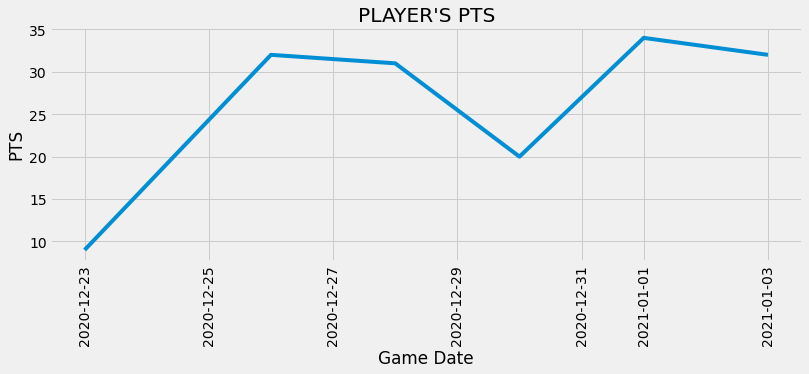

D'Angelo Russell


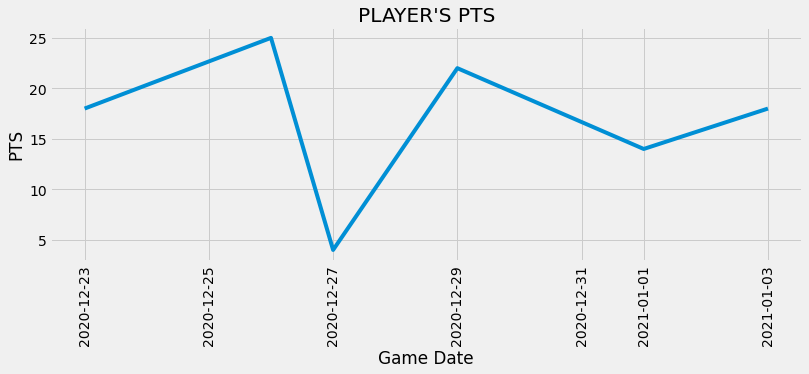

Marcus Smart


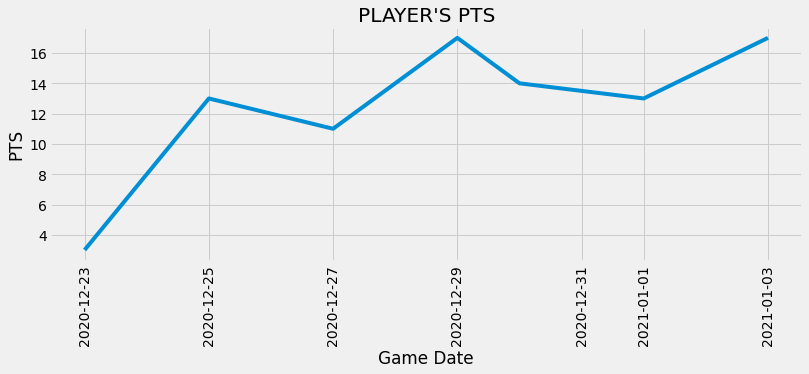

Tobias Harris


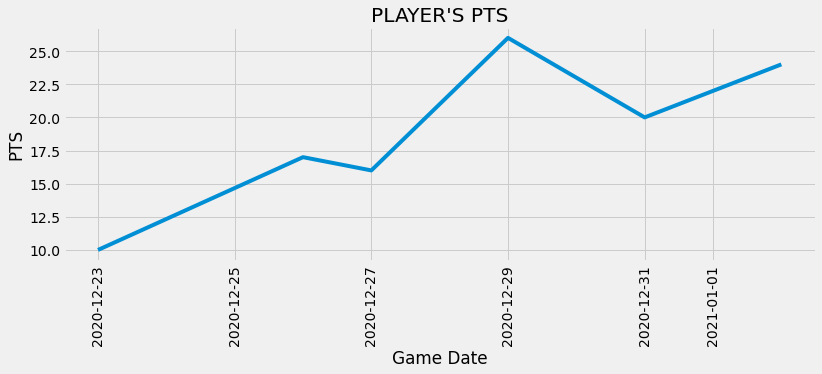

Bam Adebayo


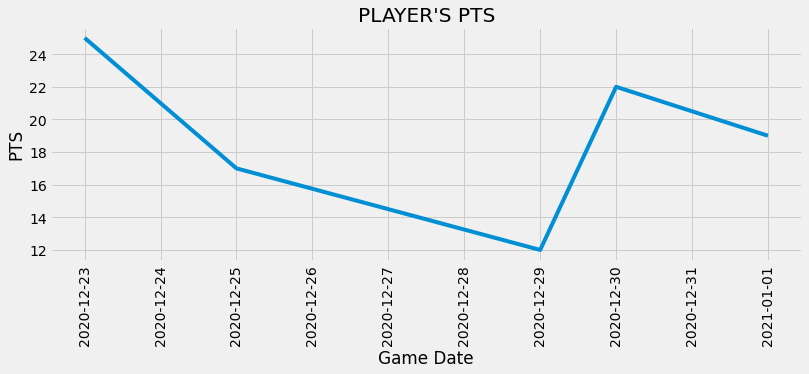

Al Horford


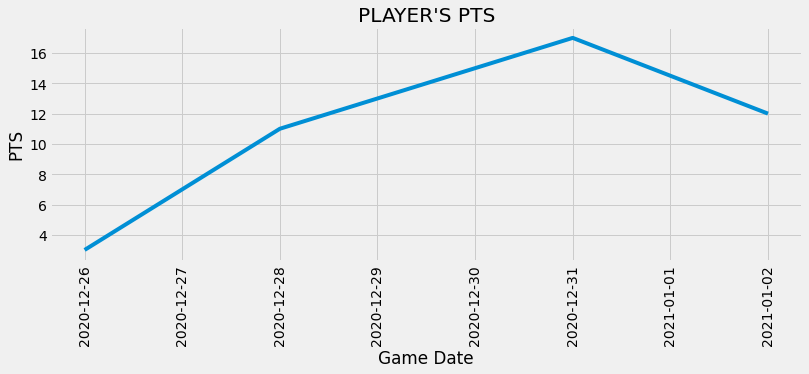

Jusuf Nurkic


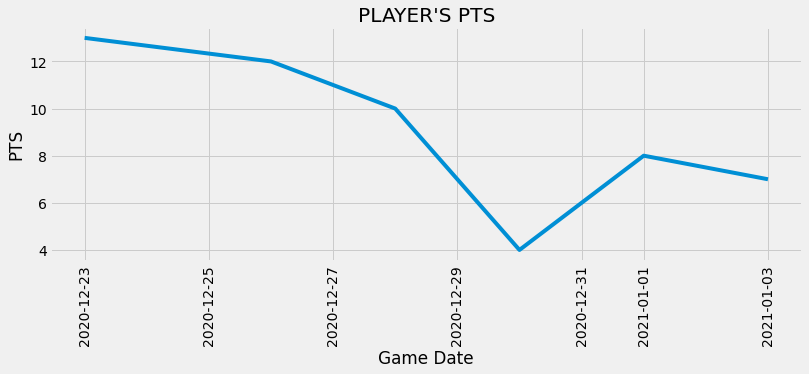

Thomas Bryant


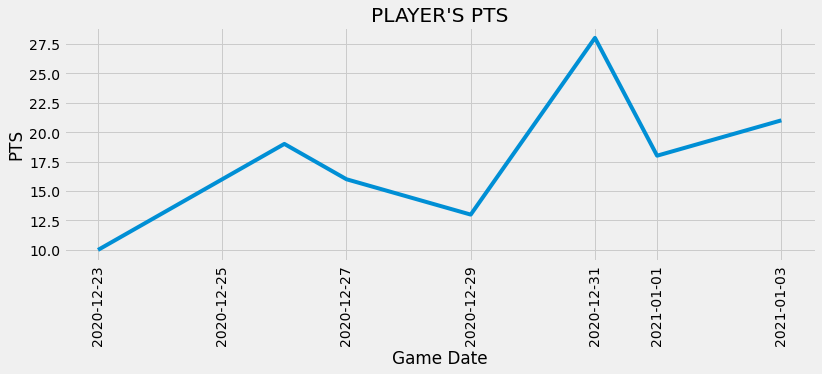

Dennis Schroder


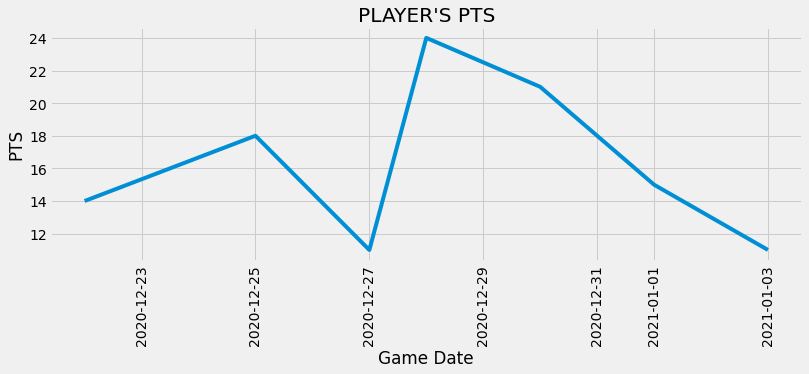

Daniel Theis


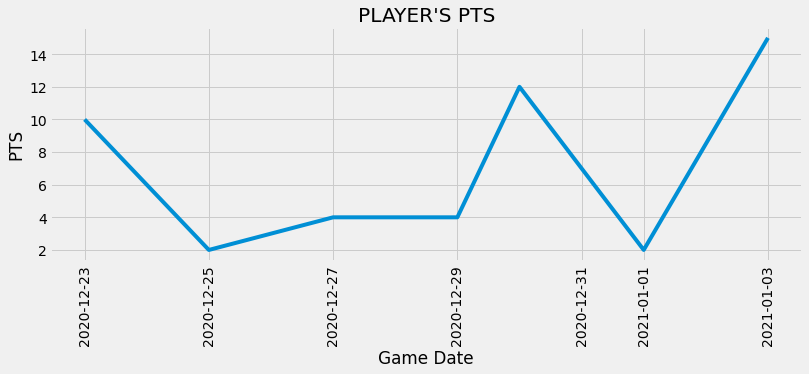

Will Barton


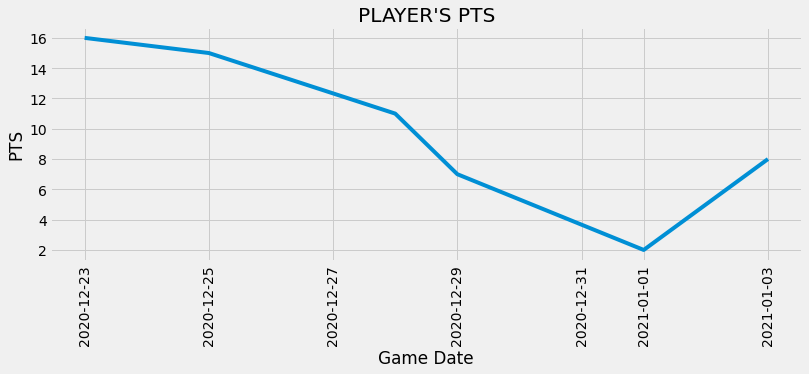

Cam Reddish


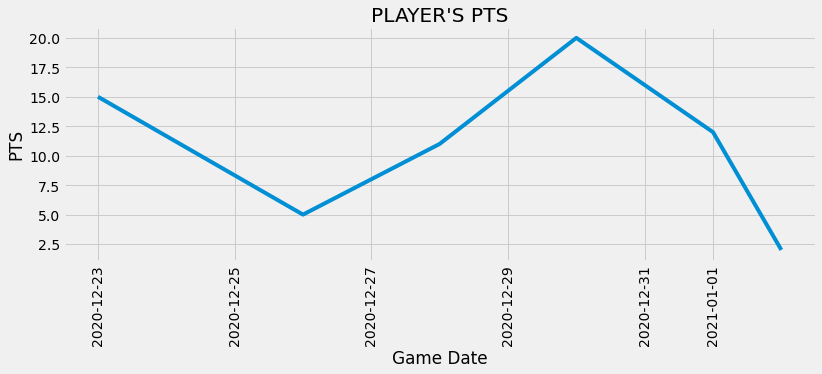

Anthony Edwards


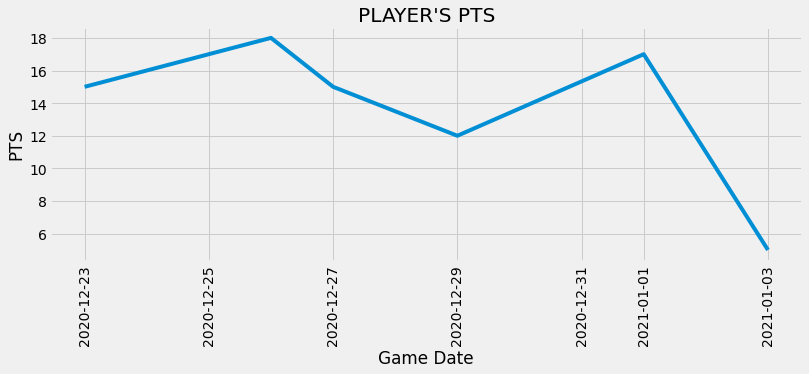

In [99]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='PTS', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S PTS')
    plt.xlabel('Game Date')
    plt.ylabel('PTS')
    plt.xticks(rotation=90)
    plt.show()

Damian Lillard


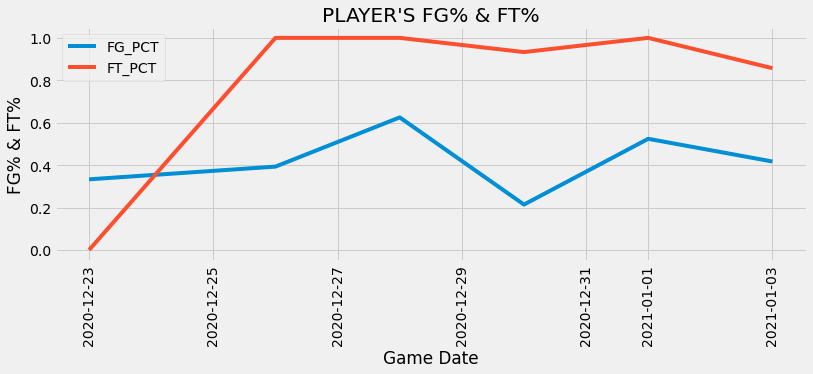

D'Angelo Russell


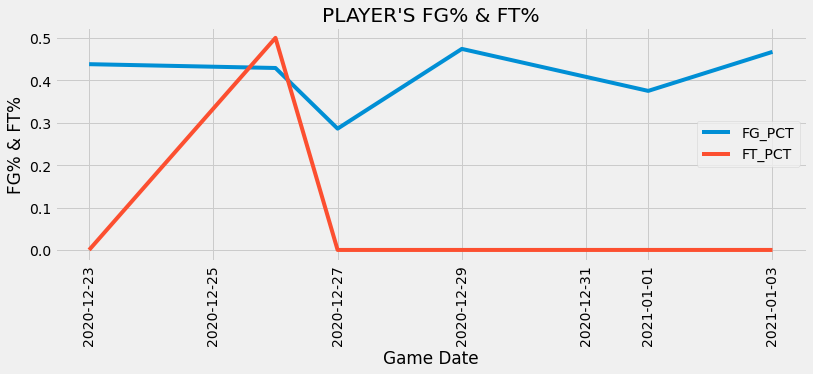

Marcus Smart


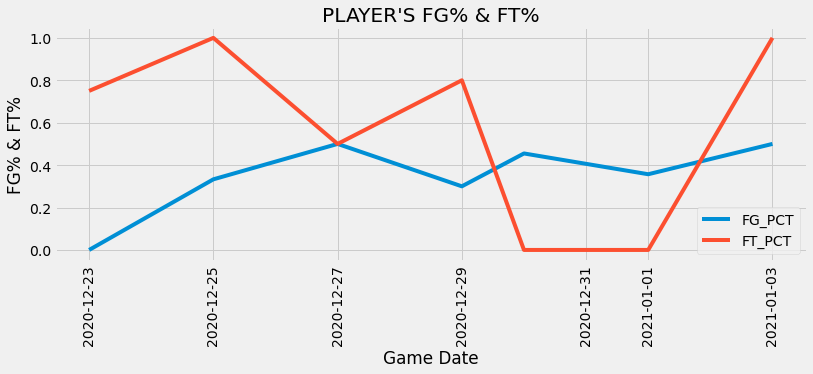

Tobias Harris


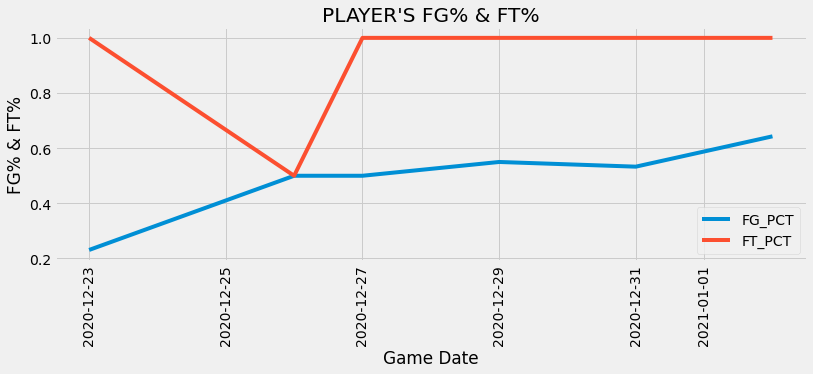

Bam Adebayo


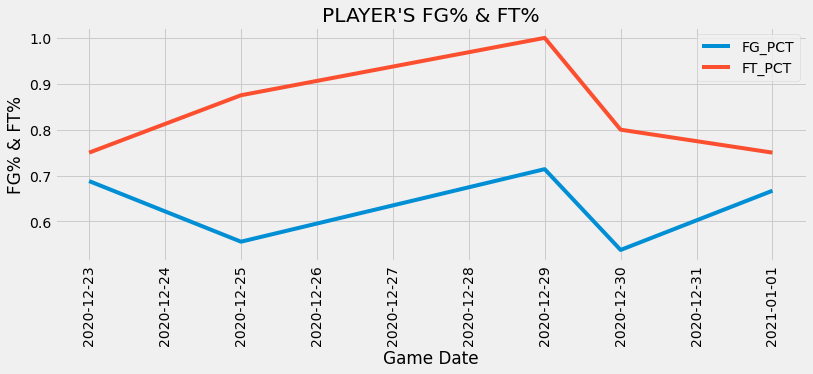

Al Horford


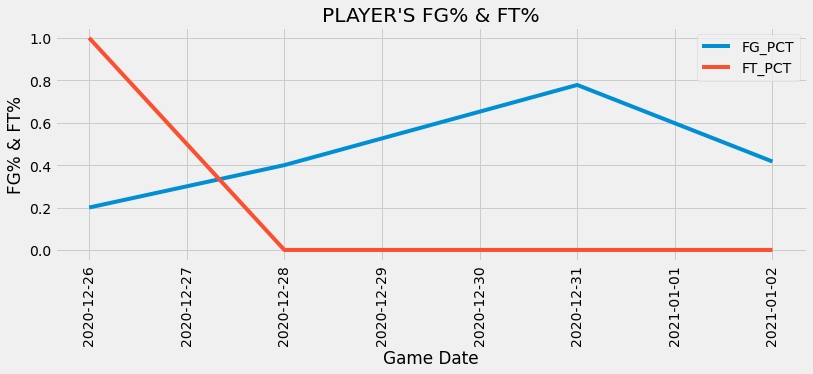

Jusuf Nurkic


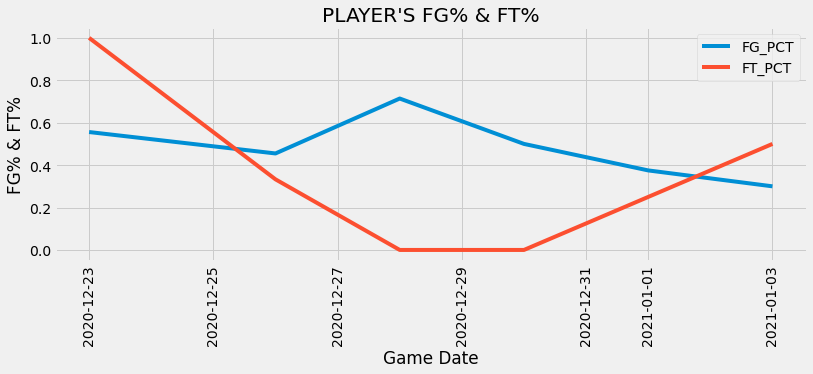

Thomas Bryant


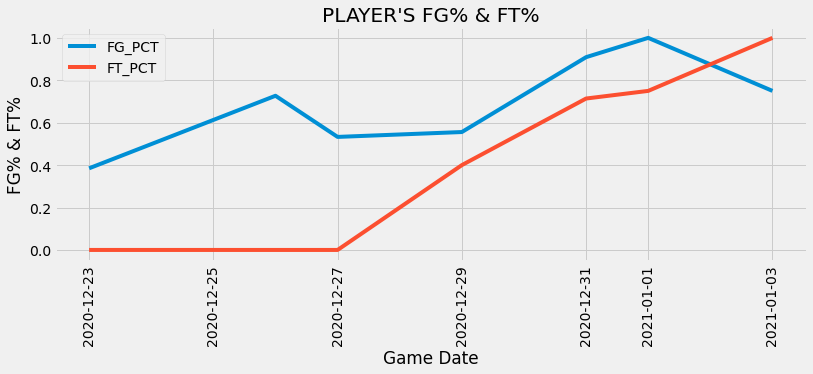

Dennis Schroder


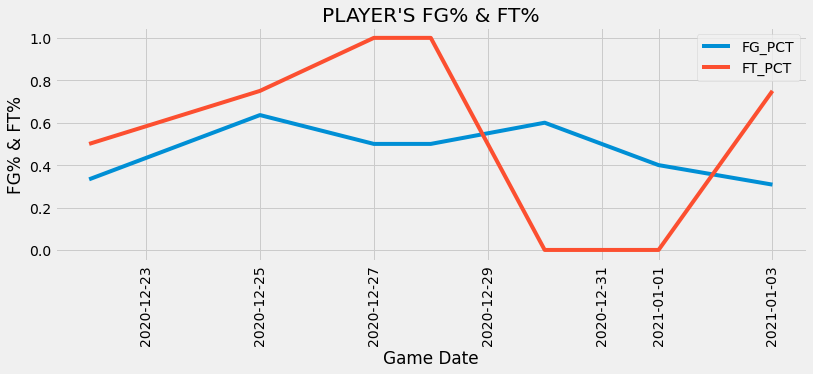

Daniel Theis


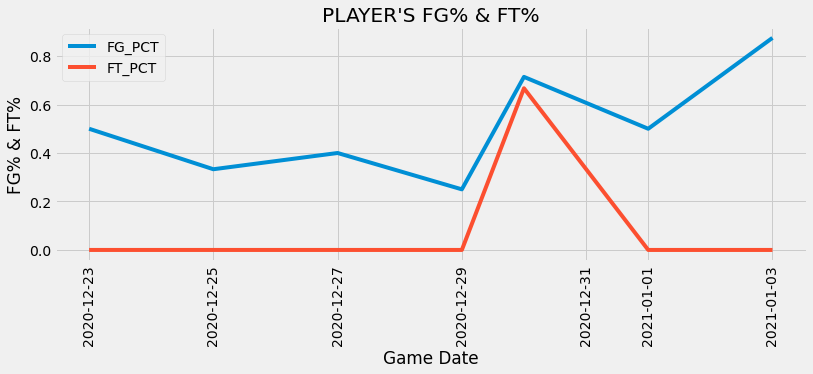

Will Barton


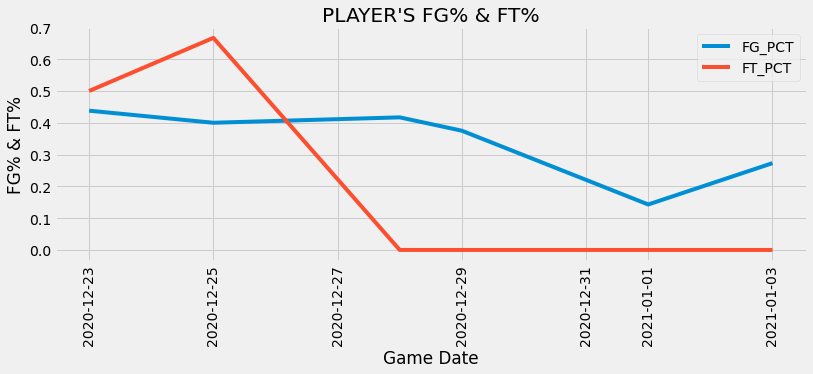

Cam Reddish


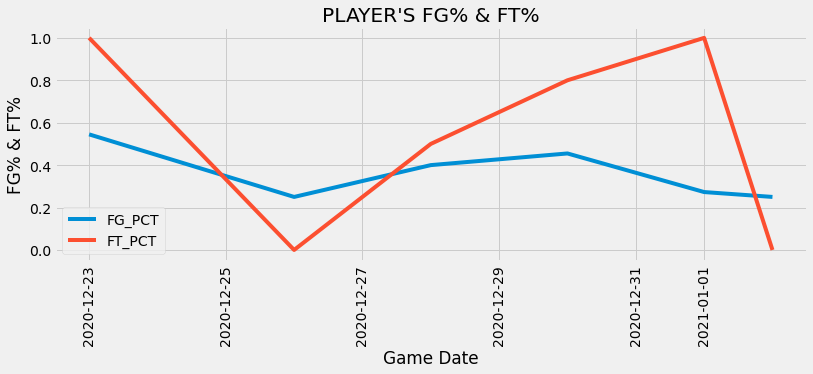

Anthony Edwards


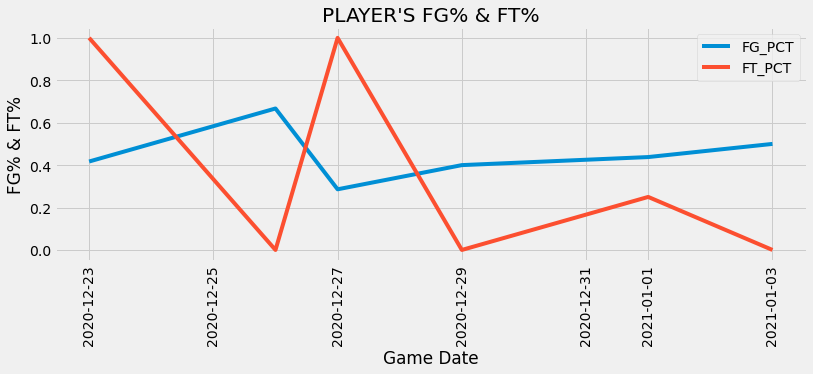

In [106]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='FG_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='FT_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S FG% & FT%')
    plt.xlabel('Game Date')
    plt.ylabel('FG% & FT%')
    plt.xticks(rotation=90)
    plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
    plt.show()

Damian Lillard


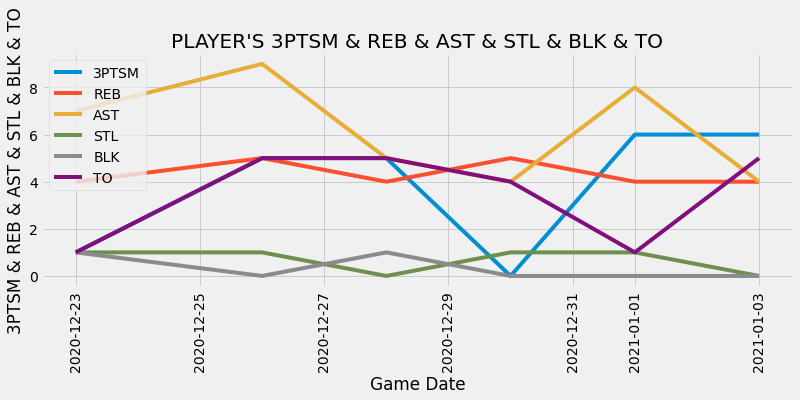

D'Angelo Russell


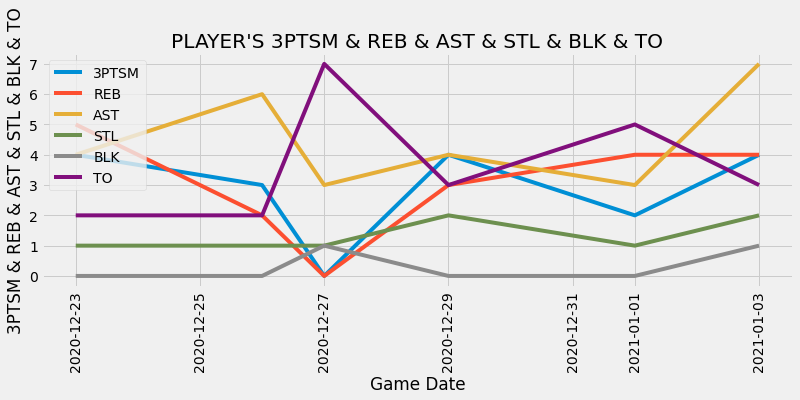

Marcus Smart


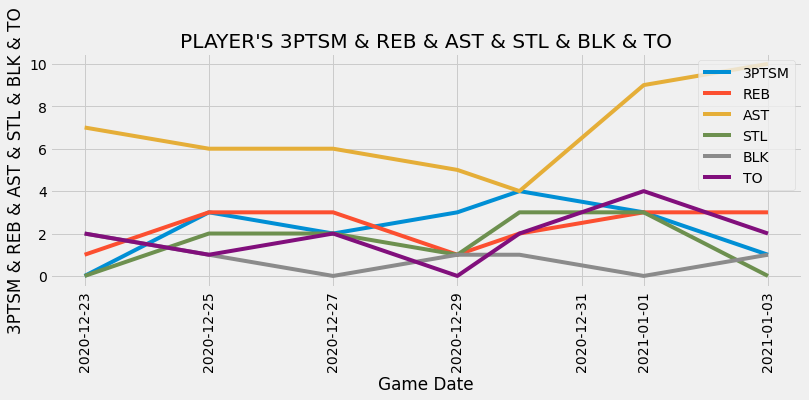

Tobias Harris


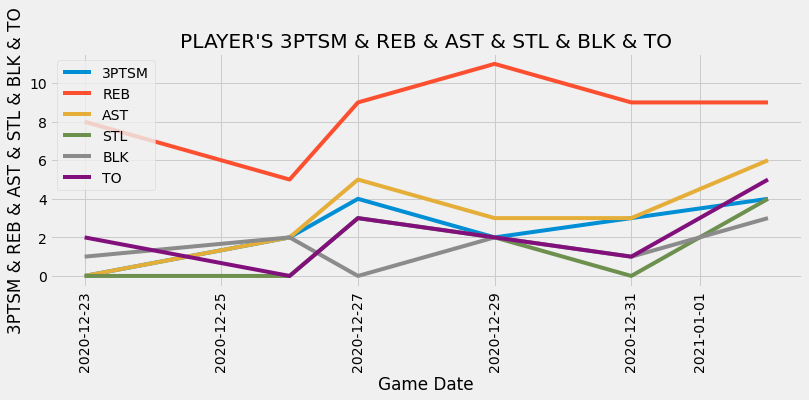

Bam Adebayo


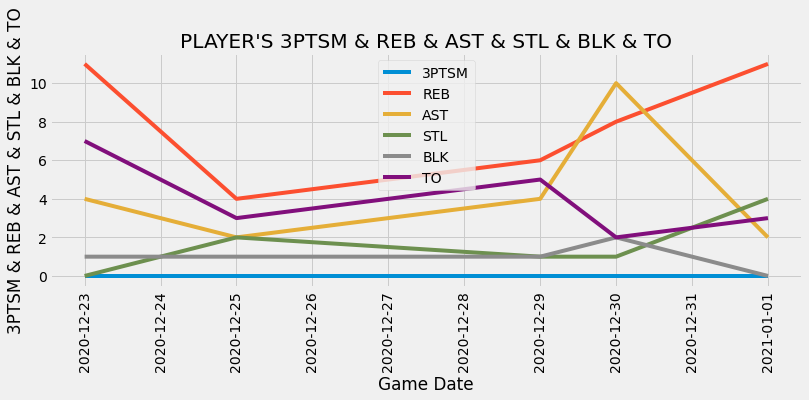

Al Horford


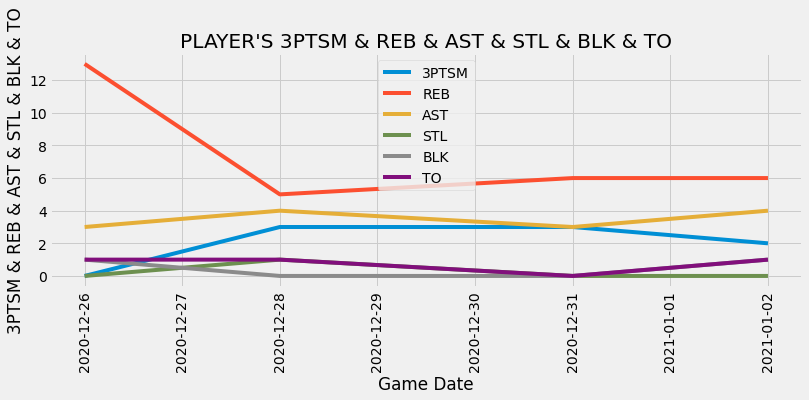

Jusuf Nurkic


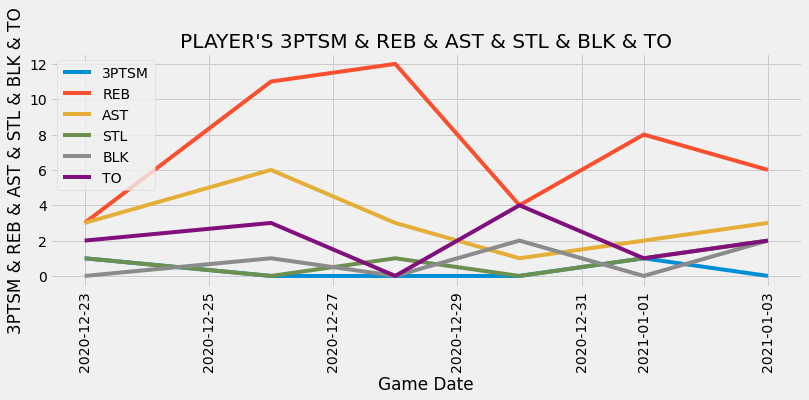

Thomas Bryant


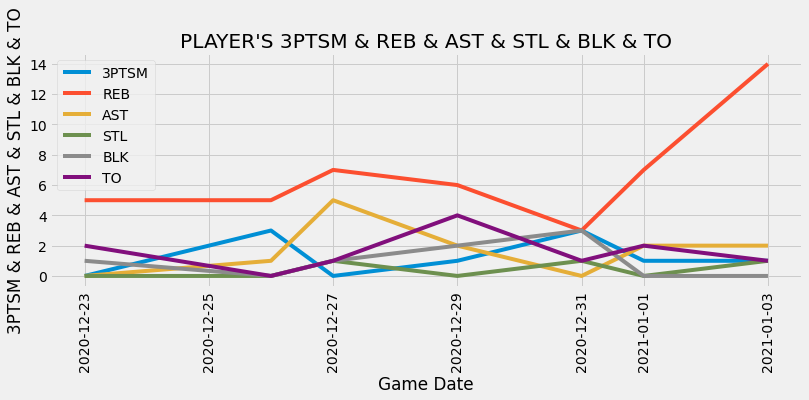

Dennis Schroder


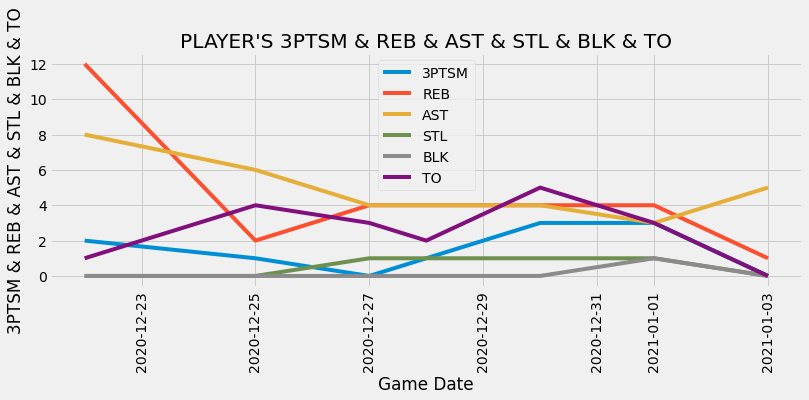

Daniel Theis


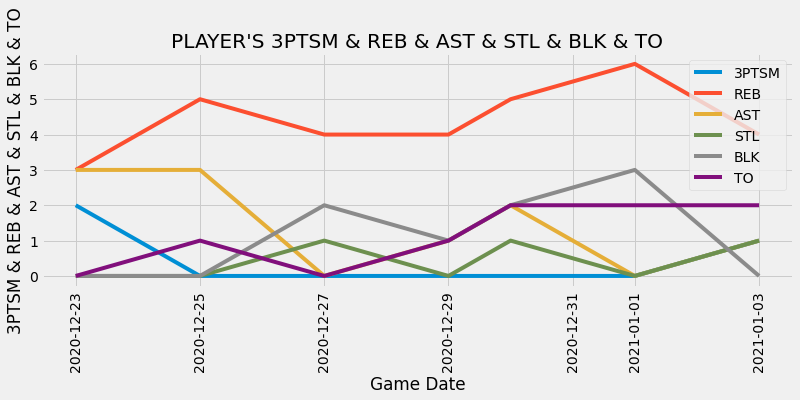

Will Barton


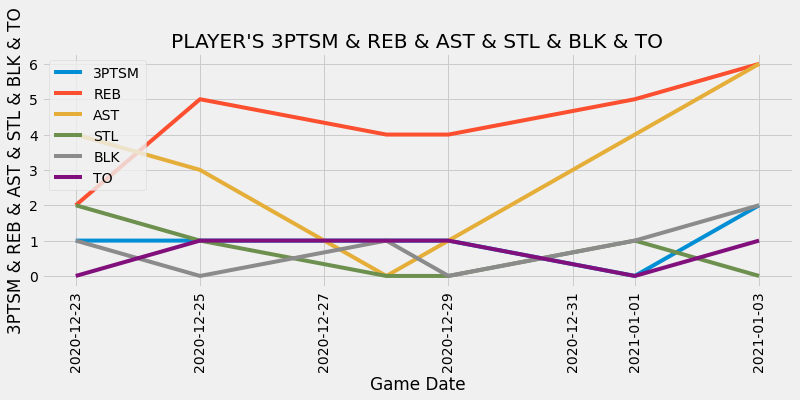

Cam Reddish


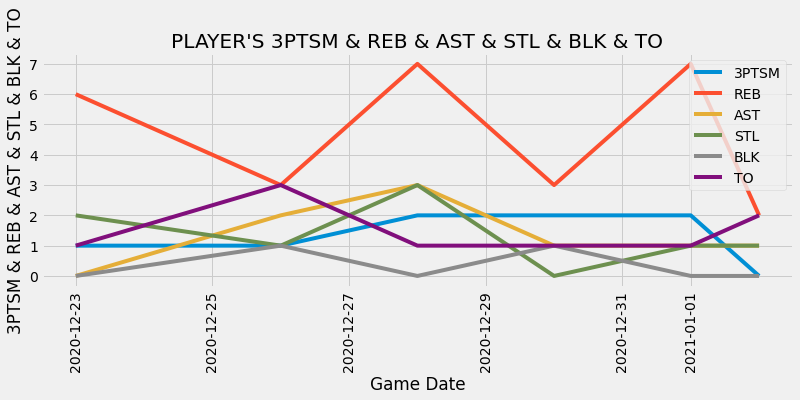

Anthony Edwards


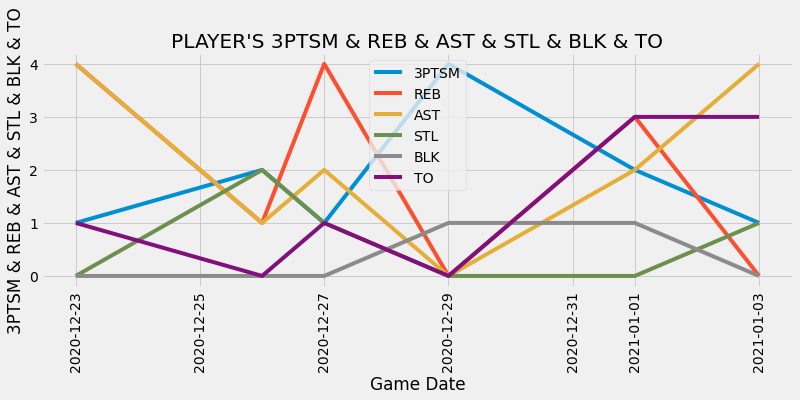

In [110]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='FG3M', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='REB', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='AST', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='STL', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='BLK', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='TO', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S 3PTSM & REB & AST & STL & BLK & TO')
    plt.xlabel('Game Date')
    plt.ylabel('3PTSM & REB & AST & STL & BLK & TO')
    plt.xticks(rotation=90)
    plt.legend(['3PTSM', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
    plt.show()